**Car License Plate Detection dataset**

This dataset is useful for tasks related to object detection and localization. Researchers and practitioners can use this dataset to train and evaluate object detection models, especially those designed to locate and recognize car license plates in images. The bounding box annotations in the PASCAL VOC format allow for the precise identification of the region of interest within each image.

The dataset you're referring to contains 433 images with bounding box annotations of car license plates within those images. Here's a more detailed explanation:

Number of Images: The dataset includes 433 images. Each image contains one or more car license plates.

Bounding Box Annotations: For each of the 433 images, bounding box annotations are provided. These annotations specify the coordinates of rectangular boxes (bounding boxes) that surround the car license plates within the images.

PASCAL VOC Format: The annotations in this dataset are provided in the PASCAL VOC (Visual Object Classes) format. This is a widely used format for annotating object locations in images. In PASCAL VOC format, each annotation includes the following information:

Bounding Box Coordinates: The coordinates (x, y) of the top-left corner of the bounding box and the coordinates (x, y) of the bottom-right corner of the bounding box. These coordinates define the rectangular region that encloses the car license plate.

Object Class: In this case, the object class is "car license plate," which indicates that the bounding box is annotating the location of a license plate.

In the context of the PASCAL VOC (Visual Object Classes) format, the annotations are typically saved in XML files, and these XML files follow the PASCAL VOC format. Therefore, when you see annotations saved with ".xml" file extensions, they are often in the PASCAL VOC format. So, in your example, "a23.xml" would typically contain annotations in the PASCAL VOC format.

inside data set we have to folder "images" and "annotations" . in images there are 433 color photo with png format, size 400*(200-300) and between 100 kb to 1 mb for example car0.png Annotations folder 433 for example car0.xml

In [ ]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torchvision.models as models
import torch
from torchvision.transforms import functional as F
from PIL import Image

In [4]:

def get_model(model_name, num_classes, pretrained=True):
    return models.__dict__[model_name](pretrained)

def parse_voc_xml(xml_file):
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_file)
    root = tree.getroot()
    for obj in root.findall('object'):
        name = obj.find('name').text
        bndbox = obj.find('bndbox')
        xmin = int(bndbox.find('xmin').text)
        ymin = int(bndbox.find('ymin').text)
        xmax = int(bndbox.find('xmax').text)
        ymax = int(bndbox.find('ymax').text)
        yield name, xmin, ymin, xmax, ymax

def plot_bbox(image, bboxes, color='red'):
    img = np.array(image)
    for bbox in bboxes:
        name, xmin, ymin, xmax, ymax = bbox
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, 2)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

In [123]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [124]:
import zipfile

In [125]:
# Define the path to your dataset zip file in Google Drive
google_drive_path = '/content/drive/My Drive/computervision/plate/Car Plate Detection.zip'
# for example : google_drive_path = '/content/drive/My Drive/classification/MVTec AD dataset.zip'



In [126]:
# Specify the directory where you want to extract the dataset
extract_dir = '/content/dataset/'

In [127]:
# Extract the zip file
with zipfile.ZipFile(google_drive_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

In [128]:
import os

In [129]:
# Check the contents of the extracted dataset folder
os.listdir(extract_dir)

['annotations', 'images']

In [130]:


# Update DATA_DIR to the path in your Google Colab environment
DATA_DIR = '/content/drive/My Drive/computervision/plate/Car Plate Detection/'




In [131]:
# Check directory contents
os.listdir(DATA_DIR)

['images', 'annotations']

In [132]:
# Image directory
image_dir = f'{DATA_DIR}images'



In [15]:
import glob

In [16]:
trn_fnames = glob.glob(f'{image_dir}/*.png')
trn_fnames[:5]

['/content/drive/My Drive/computervision/plate/Car Plate Detection/images/Cars106.png',
 '/content/drive/My Drive/computervision/plate/Car Plate Detection/images/Cars135.png',
 '/content/drive/My Drive/computervision/plate/Car Plate Detection/images/Cars102.png',
 '/content/drive/My Drive/computervision/plate/Car Plate Detection/images/Cars0.png',
 '/content/drive/My Drive/computervision/plate/Car Plate Detection/images/Cars103.png']

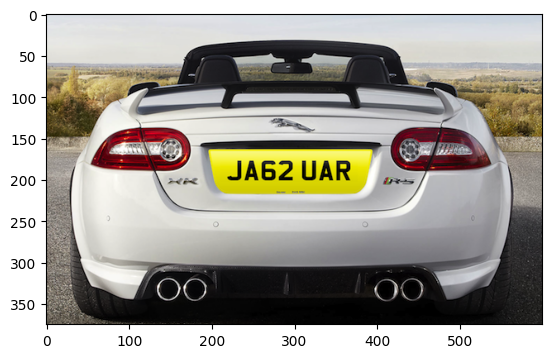

In [37]:
img = plt.imread(trn_fnames[27])
plt.imshow(img)
plt.show()  # Use plt.show() if image display doesn't work as expected

In [133]:

# Image directory
image_dir = f'{DATA_DIR}images'

# Directory containing your PASCAL VOC format XML annotations
anno_dir = f'{DATA_DIR}annotations'




In [33]:
# Model name
model_name = 'resnet50'
# Load the model
model = get_model(model_name, num_classes=2, pretrained=True)


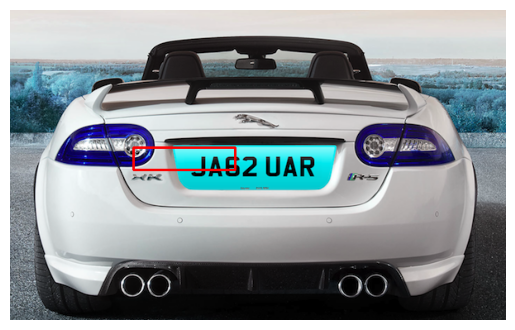

In [38]:
# Loop through your XML annotations
for xml_file in os.listdir(anno_dir):
    image_name = xml_file.replace('.xml', '.png')  # Assuming images have the same name with .png extension
    image_path = os.path.join(image_dir, image_name)

    # Open the image and convert it to RGB format
    image = Image.open(image_path).convert('RGB')

    # Convert the image to a tensor
    image_tensor = F.to_tensor(image).unsqueeze(0)

    # Parse the XML to get bounding box coordinates
    bboxes = list(parse_voc_xml(os.path.join(anno_dir, xml_file)))

    # Perform object detection using the model on the image tensor
    with torch.no_grad():
        output = model(image_tensor)

    # Post-process the output if needed
    # For instance, you can use torchvision's non-maximum suppression to filter detected objects.

    # Plot the image with bounding boxes
    #plot_bbox(image, bboxes)


# Define color as a tuple (B, G, R)
color = (0, 0, 255)  # This represents red in BGR format

# Normalize image data
#img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)



# Plot the bounding boxes
for bbox in bboxes:
    name, xmin, ymin, xmax, ymax = bbox
    cv2.rectangle(img, (xmin, ymin), (xmax, ymax), color, 2)

# Display the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()




In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
import glob
import os
from PIL import Image

from keras.applications.vgg16 import VGG16
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Input, Dropout
from keras.models import Model, Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

# Define the path to your dataset in Google Drive
DATA_DIR = '/content/dataset/'  # Update this path to match your Google Drive location

# Image directory
image_dir = os.path.join(DATA_DIR, 'images')

# Directory containing your PASCAL VOC format XML annotations
anno_dir = os.path.join(DATA_DIR, 'annotations')

# List image files
trn_fnames = glob.glob(os.path.join(image_dir, '*.png'))



In [135]:
import pandas as pd
import os
import xml.etree.ElementTree as ET

# Define the path to your annotation directory
anno_dir = '/content/drive/My Drive/computervision/plate/Car Plate Detection/annotations/'

# Create an empty list to store the annotations
annotations = []

# Loop through the XML annotation files
for xml_file in os.listdir(anno_dir):
    if xml_file.endswith('.xml'):
        xml_path = os.path.join(anno_dir, xml_file)

        tree = ET.parse(xml_path)
        root = tree.getroot()

        for obj in root.findall('object'):
            name = obj.find('name').text
            bndbox = obj.find('bndbox')
            xmin = int(bndbox.find('xmin').text)
            ymin = int(bndbox.find('ymin').text)
            xmax = int(bndbox.find('xmax').text)
            ymax = int(bndbox.find('ymax').text)

            annotations.append({
                'image_name': xml_file.replace('.xml', '.png'),
                'class_name': name,
                'xmin': xmin,
                'ymin': ymin,
                'xmax': xmax,
                'ymax': ymax
            })

# Create a DataFrame from the annotations
df = pd.DataFrame(annotations)

# Display the first few rows
df.head()



,image_name,class_name,xmin,ymin,xmax,ymax
0,Cars1.png,licence,134,128,262,160
1,Cars0.png,licence,226,125,419,173
2,Cars102.png,licence,66,147,322,199
3,Cars105.png,licence,152,147,206,159
4,Cars10.png,licence,140,5,303,148


In [136]:
import os

directory_name = "Car Plate Detection"

if not os.path.exists(directory_name):
    os.mkdir(directory_name)


In [137]:
import os
import cv2
import numpy as np
from xml.etree import ElementTree as ET

# Initialize the dataset dictionary
dataset = {
    "image_name": [],
    "image_width": [],
    "image_height": [],
    "top_x": [],
    "top_y": [],
    "bottom_x": [],
    "bottom_y": []
}

counter = 0

# Iterate through your PASCAL VOC format XML annotations
for xml_file in os.listdir(anno_dir):
    # Parse the XML file
    tree = ET.parse(os.path.join(anno_dir, xml_file))
    root = tree.getroot()

    # Extract information from the XML
    filename = root.find('filename').text
    width = int(root.find('size/width').text)
    height = int(root.find('size/height').text)

    # Extract coordinates of the bounding box
    xmin = int(root.find('object/bndbox/xmin').text)
    ymin = int(root.find('object/bndbox/ymin').text)
    xmax = int(root.find('object/bndbox/xmax').text)
    ymax = int(root.find('object/bndbox/ymax').text)

    # Save the image
    image_path = os.path.join(image_dir, filename)
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    #img_filename = f"licensed_car{counter}.jpeg"
    img_filename = f"licensed_car{counter}.png"
    img_path = os.path.join("Car Plate Detection", img_filename)
    cv2.imwrite(img_path, img)



    # Update the dataset dictionary
    dataset["image_name"].append(img_filename)
    dataset["image_width"].append(width)
    dataset["image_height"].append(height)
    dataset["top_x"].append(xmin)
    dataset["top_y"].append(ymin)
    dataset["bottom_x"].append(xmax)
    dataset["bottom_y"].append(ymax)

    counter += 1

print(f"Downloaded {counter} car images.")


Downloaded 433 car images.


In [138]:
df = pd.DataFrame(dataset)
df.head()

,image_name,image_width,image_height,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.png,400,248,134,128,262,160
1,licensed_car1.png,500,268,226,125,419,173
2,licensed_car2.png,350,263,66,147,322,199
3,licensed_car3.png,400,240,152,147,206,159
4,licensed_car4.png,400,225,140,5,303,148


In [139]:
import pandas as pd

# Create a DataFrame from the dataset dictionary
df = pd.DataFrame(dataset)

# Save the DataFrame to a CSV file
csv_filename = "car_license_plates.csv"
df.to_csv(csv_filename, index=False)

print(f"Dataset saved as {csv_filename}")


Dataset saved as car_license_plates.csv


In [140]:
import pandas as pd

# Read the CSV file
df = pd.read_csv("car_license_plates.csv")

# Add ".jpeg" to the "image_name" column
#df["image_name"] = df["image_name"] + ".jpeg"

# Remove the "image_width" and "image_height" columns
df.drop(["image_width", "image_height"], axis=1, inplace=True)

# Display the first few rows of the modified DataFrame
df.head()



,image_name,top_x,top_y,bottom_x,bottom_y
0,licensed_car0.png,134,128,262,160
1,licensed_car1.png,226,125,419,173
2,licensed_car2.png,66,147,322,199
3,licensed_car3.png,152,147,206,159
4,licensed_car4.png,140,5,303,148


In [141]:
import numpy as np

# Define the number of samples to select
#num_samples_to_select = 5

# Randomly select 5 sample indices
lucky_test_samples = np.random.randint(0, len(df), 5)

# Create a reduced DataFrame by dropping the selected samples
reduced_df = df.drop(lucky_test_samples, axis=0)






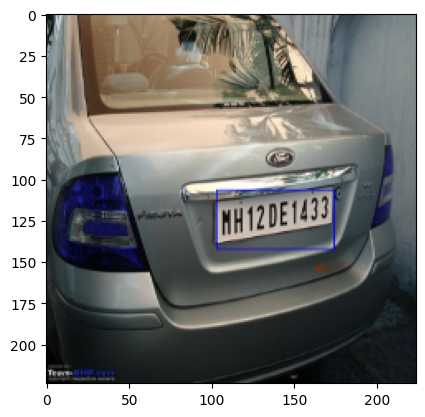

In [142]:
import cv2
import matplotlib.pyplot as plt

WIDTH = 224
HEIGHT = 224

def show_img(index):
    # Load the image
    image = cv2.imread("Car Plate Detection/" + df["image_name"].iloc[index])

    # Convert the image to RGB
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Get bounding box coordinates
    tx = int(df["top_x"].iloc[index])
    ty = int(df["top_y"].iloc[index])
    bx = int(df["bottom_x"].iloc[index])
    by = int(df["bottom_y"].iloc[index])

    # Draw the bounding box
    image_with_box = cv2.rectangle(image, (tx, ty), (bx, by), (0, 0, 255), 1)

    # Resize the image
    image_with_box = cv2.resize(image_with_box, dsize=(WIDTH, HEIGHT))

    # Display the image with the bounding box
    plt.imshow(image_with_box)
    plt.show()

# Example: Show the image at index 0
show_img(13)


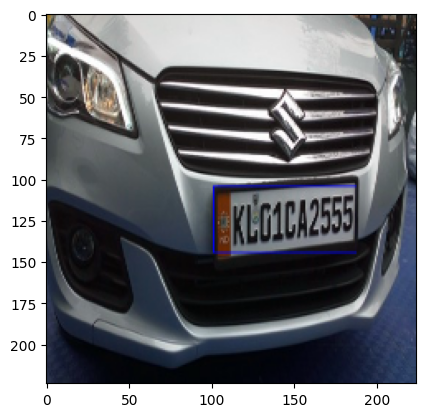

In [115]:
# Example: Show the image
show_img(1)

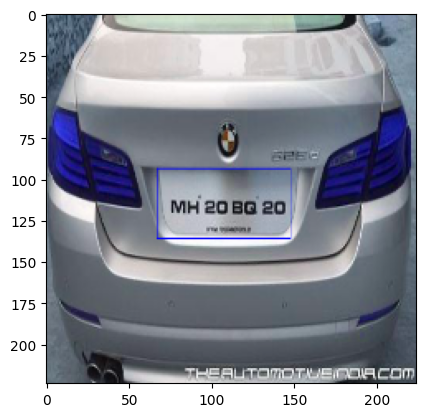

In [116]:
# Example: Show the image
show_img(7)

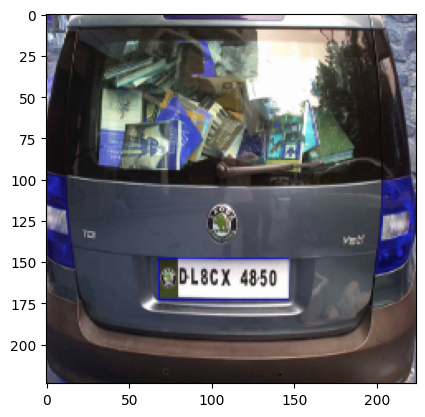

In [117]:
# Example: Show the image
show_img(100)

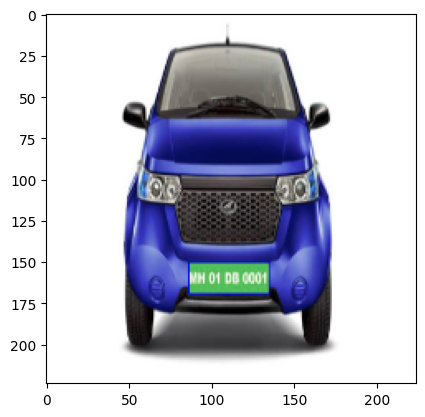

In [118]:
# Example: Show the image
show_img(12)

In [143]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

train_generator = datagen.flow_from_dataframe(
    dataframe=reduced_df,
    directory="Car Plate Detection",
    x_col="image_name",  # Update this to "image_name"
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="training",
    dtype='float32',  # Specify the data type
    format='png'  # Specify the image format (png in this case)
)

validation_generator = datagen.flow_from_dataframe(
    dataframe=reduced_df,
    directory="Car Plate Detection",
    x_col="image_name",  # Update this to "image_name"
    y_col=["top_x", "top_y", "bottom_x", "bottom_y"],
    target_size=(WIDTH, HEIGHT),
    batch_size=32,
    class_mode="raw",  # Use "raw" for regression tasks
    subset="validation",
    dtype='float32',  # Specify the data type
    format='png'  # Specify the image format (png in this case)
)


Found 386 validated image filenames.
Found 42 validated image filenames.


In [144]:
# Assuming 'x_col' is the column containing image filenames with ".png" extension
image_filenames = reduced_df['image_name'].str.replace('.png', '')

# Check the first few rows to verify the format
print(image_filenames.head())




0    licensed_car0
1    licensed_car1
2    licensed_car2
3    licensed_car3
4    licensed_car4
Name: image_name, dtype: object


<ipython-input-144-2eb2a05a8606>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  image_filenames = reduced_df['image_name'].str.replace('.png', '')


In [145]:
# Check the directory path
print("Directory Path:", '/content/drive/My Drive/computervision/plate/Car Plate Detection/')


Directory Path: /content/drive/My Drive/computervision/plate/Car Plate Detection/


In [146]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Model

WIDTH = 224
HEIGHT = 224
CHANNEL= 3
# Define the base model (VGG16)
base_model = VGG16(weights="imagenet", include_top=False, input_shape=(HEIGHT, WIDTH, CHANNEL))

# Freeze the layers of the base model
for layer in base_model.layers:
    layer.trainable = False

# Create the custom head for regression
x = Flatten()(base_model.output)
x = Dense(128, activation="relu")(x)
x = Dense(64, activation="relu")(x)
x = Dense(64, activation="relu")(x)
output = Dense(4, activation="sigmoid")(x)

# Combine the base model and custom head
model = Model(inputs=base_model.input, outputs=output)

model.summary()


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [147]:
STEP_SIZE_TRAIN = int(np.ceil(train_generator.samples / train_generator.batch_size))
STEP_SIZE_VAL = int(np.ceil(validation_generator.samples / validation_generator.batch_size))

print("Train step size:", STEP_SIZE_TRAIN)
print("Validation step size:", STEP_SIZE_VAL)

train_generator.reset()
validation_generator.reset()


Train step size: 13
Validation step size: 2


In [148]:
#adam = Adam(lr=0.0005)
#model.compile(optimizer=adam, loss="mse")

#adam = Adam(learning_rate=0.0005)  # Correcting the learning rate argument with this rate i got 50000 loss at first epoch.
# big losss ----> big alpha
adam = Adam(learning_rate=0.0001)  # Lower the learning rate
model.compile(optimizer=adam, loss="mse")


In [150]:
history = model.fit(train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VAL,
                    epochs=1)

13/13 [==============================] - 255s 20s/step - loss: 46627.0742 - val_loss: 43823.9805


In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
#plt.legend()
#plt.show()


In [152]:
validation_loss = model.evaluate(validation_generator, steps=STEP_SIZE_VAL)
print("Validation Loss:", validation_loss)


2/2 [==============================] - 23s 5s/step - loss: 43823.9805
Validation Loss: 43823.98046875


1/1 [==============================] - 1s 1s/step


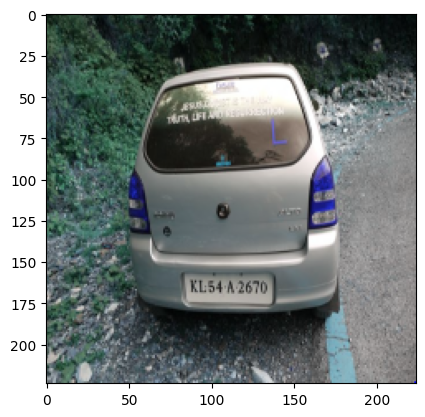

1/1 [==============================] - 1s 879ms/step


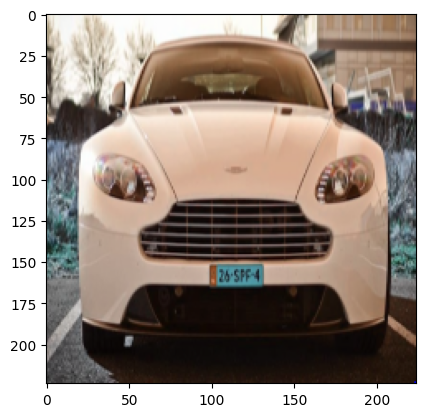

1/1 [==============================] - 1s 931ms/step


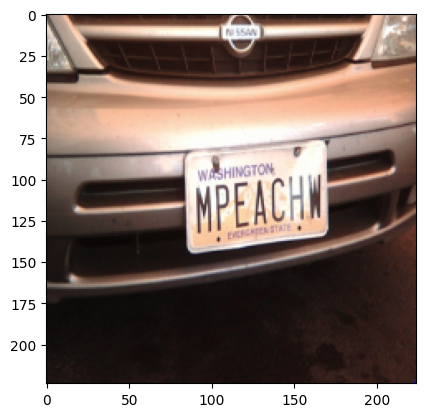

1/1 [==============================] - 0s 487ms/step


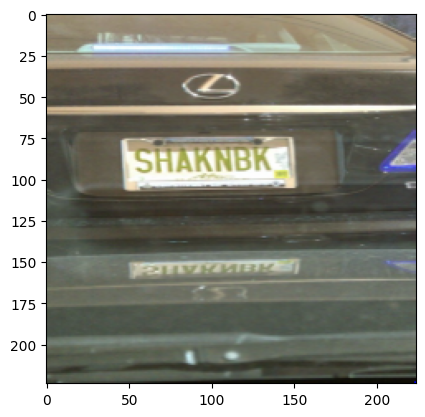

1/1 [==============================] - 0s 477ms/step


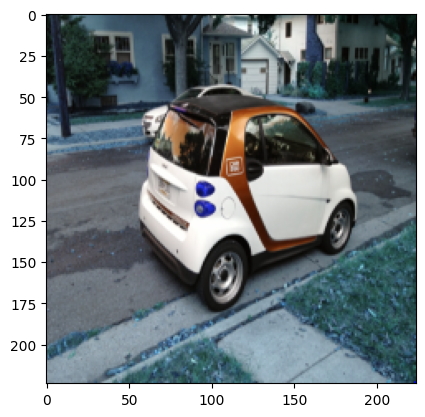

In [154]:
for idx, row in df.iloc[lucky_test_samples].iterrows():
    img = cv2.resize(cv2.imread("Car Plate Detection/" + row[0]) / 255.0, dsize=(WIDTH, HEIGHT))

    y_hat = model.predict(img.reshape(1, WIDTH, HEIGHT, 3)).reshape(-1) * WIDTH

    xt, yt = int(y_hat[0]), int(y_hat[1])
    xb, yb = int(y_hat[2]), int(y_hat[3])

    img = cv2.cvtColor(img.astype(np.float32), cv2.COLOR_BGR2RGB)
    image = cv2.rectangle(img, (xt, yt), (xb, yb), (0, 0, 255), 1)
    plt.imshow(image)
    plt.show()
